<a href="https://colab.research.google.com/github/Akhorramrouz/CS461/blob/main/naive_bayes_session02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classifier Demonstration
This project demonstrates the Naive Bayes algorithm using the Wine dataset from scikit-learn.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#### NAIVE BAYES THEORY:
Naive Bayes is based on Bayes' Theorem: P(A|B) = P(B|A) * P(A) / P(B)<br>
For classification: P(class|features) = P(features|class) * P(class) / P(features)<br>
The "naive" assumption: Features are conditionally independent given the class<br>
This means: P(x1,x2,...,xn|class) = P(x1|class) * P(x2|class) * ... * P(xn|class)<br>

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(target_names)}")
print(f"Classes: {', '.join(target_names)}")
print(f"Number of features: {len(feature_names)}")

Dataset shape: (178, 13)
Number of classes: 3
Classes: class_0, class_1, class_2
Number of features: 13


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#### GAUSSIAN NAIVE BAYES:
Assumes that features follow a Gaussian (normal) distribution<br>
For each class and feature, it estimates: μ (mean) and σ² (variance)<br>
Likelihood: P(xi|class) = (1/√(2πσ²)) * exp(-(xi-μ)²/(2σ²))<br>

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)
y_pred_proba = gnb.predict_proba(X_test)

#### MODEL EVALUATION

In [ ]:
print("\n" + "="*50)
print("MODEL PERFORMANCE")
print("="*50)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


MODEL PERFORMANCE
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#### PRIOR PROBABILITIES:
P(class) - The probability of each class before seeing any features<br>
Naive Bayes uses these as starting points, then updates based on evidence<br>

In [ ]:
print("\n" + "="*50)
print("PRIOR PROBABILITIES (learned from training data):")
print("="*50)
priors = gnb.class_prior_
for i, class_name in enumerate(target_names):
    print(f"P({class_name}): {priors[i]:.3f}")


PRIOR PROBABILITIES (learned from training data):
P(class_0): 0.331
P(class_1): 0.403
P(class_2): 0.266


#### VISUALIZATION: Confusion Matrix

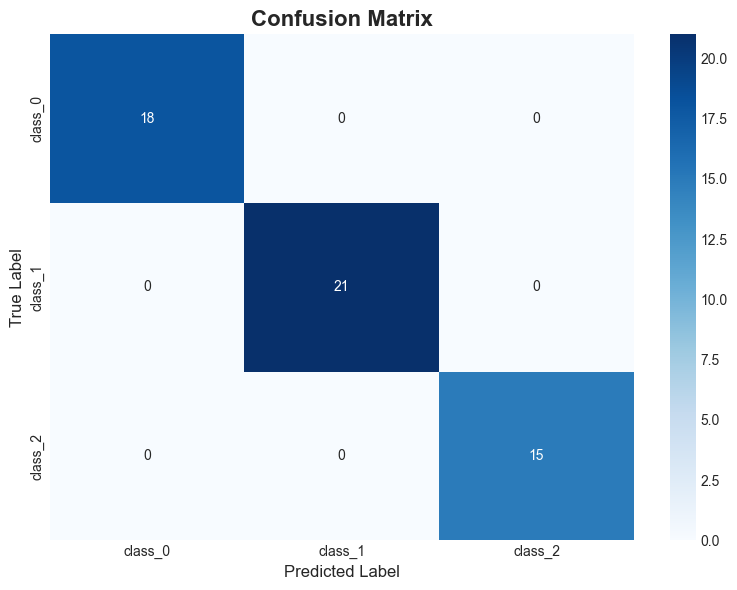

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

#### VISUALIZATION: Feature Distributions by Class
Shows why Gaussian assumption makes sense (or not) for each feature

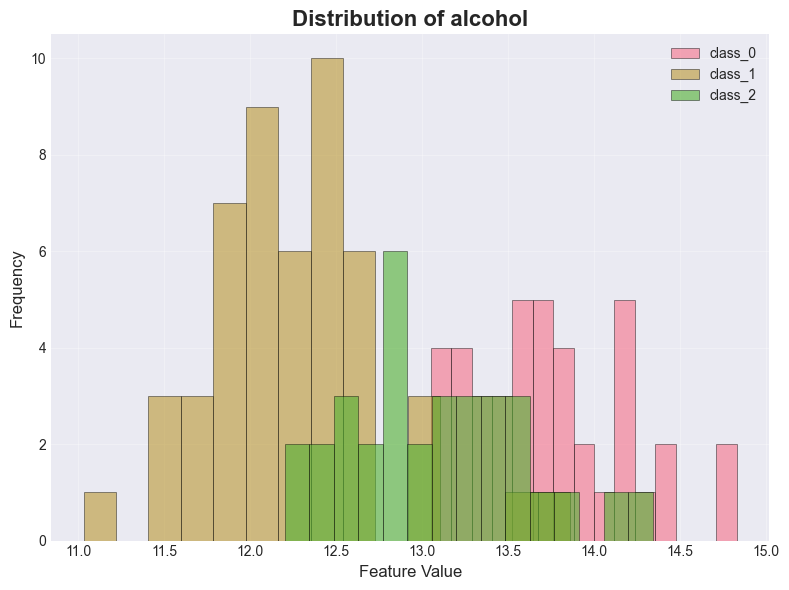

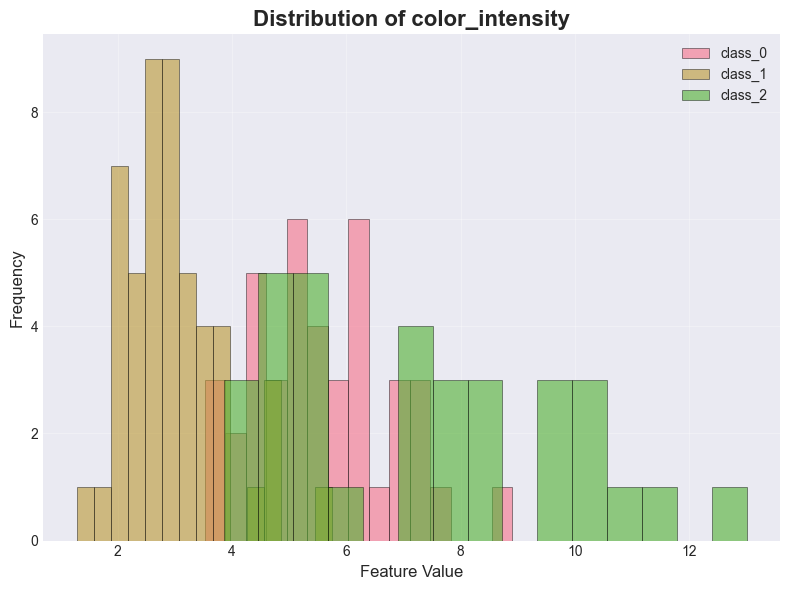

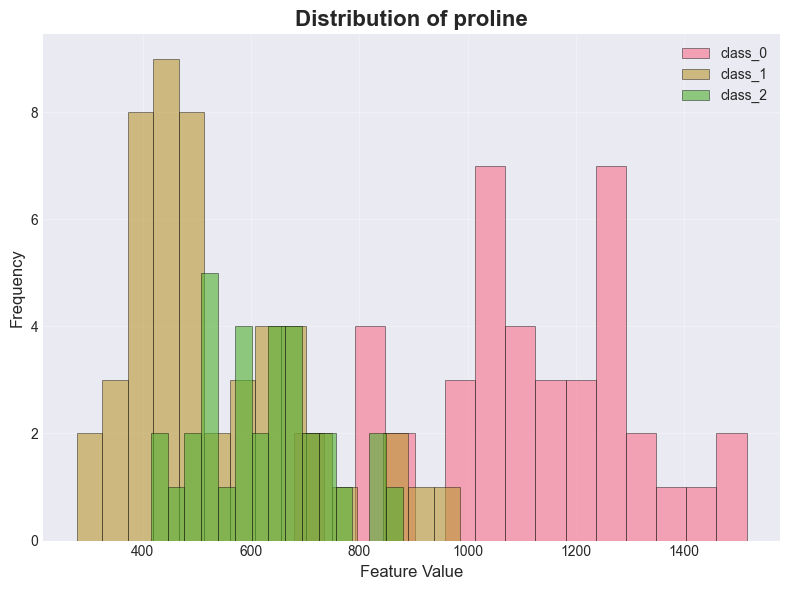

In [ ]:
features_to_plot = [0, 9, 12]  # Alcohol, Color intensity, Proline
feature_names_to_plot = [feature_names[i] for i in features_to_plot]

for idx, (feature_idx, feat_name) in enumerate(zip(features_to_plot, feature_names_to_plot)):
    plt.figure(figsize=(8, 6))

    for class_idx in range(len(target_names)):
        class_data = X_train[y_train == class_idx, feature_idx]
        plt.hist(class_data, alpha=0.6, label=target_names[class_idx],
                bins=15, edgecolor='black', linewidth=0.5)

    plt.title(f'Distribution of {feat_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Feature Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

#### VISUALIZATION: Decision Boundary (using PCA for 2D projection)

In [ ]:
# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a new model on PCA-transformed data for visualization
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train)

GaussianNB()

#### DECISION BOUNDARY:
The boundary where P(class1|features) = P(class2|features)<br>
Naive Bayes creates smooth boundaries due to Gaussian assumptions<br>
Using contour lines instead of dense mesh for faster computation

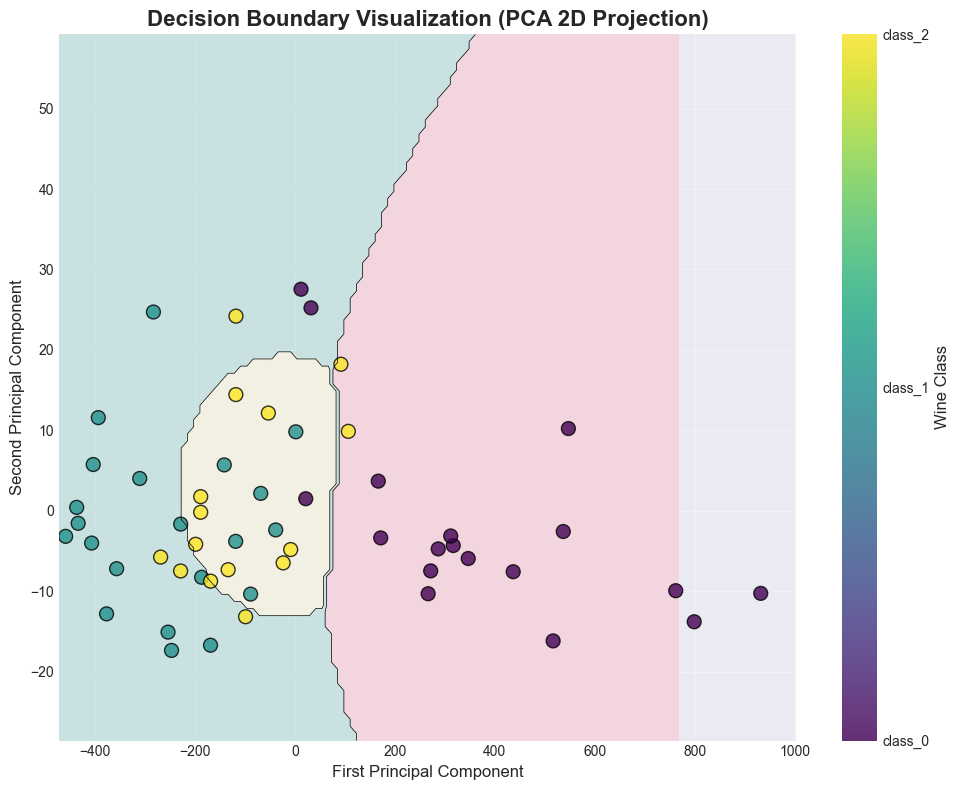

PCA explained variance ratio: [0.99775928 0.00205752]
Total variance explained: 1.000


In [ ]:
plt.figure(figsize=(10, 8))

# Create a coarser mesh for faster computation
n_points = 100  # Reduced from default for faster execution
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx = np.linspace(x_min, x_max, n_points)
yy = np.linspace(y_min, y_max, n_points)
XX, YY = np.meshgrid(xx, yy)

# Predict on the mesh
Z = gnb_pca.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Plot decision regions using contourf (faster than pcolormesh for this size)
plt.contourf(XX, YY, Z, alpha=0.4, levels=np.arange(len(target_names)+1)-0.5,
             colors=['#FFB6C1', '#98D8C8', '#FFFACD'])

# Plot decision boundaries as contour lines
plt.contour(XX, YY, Z, colors='black', linewidths=0.5,
            levels=np.arange(len(target_names))-0.5)

# Plot test points
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                     c=y_test, cmap='viridis', edgecolor='black',
                     s=100, alpha=0.8)

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label('Wine Class', fontsize=12)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(target_names)

plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Decision Boundary Visualization (PCA 2D Projection)', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.3f}")

#### VISUALIZATION: Prediction Probabilities Heatmap

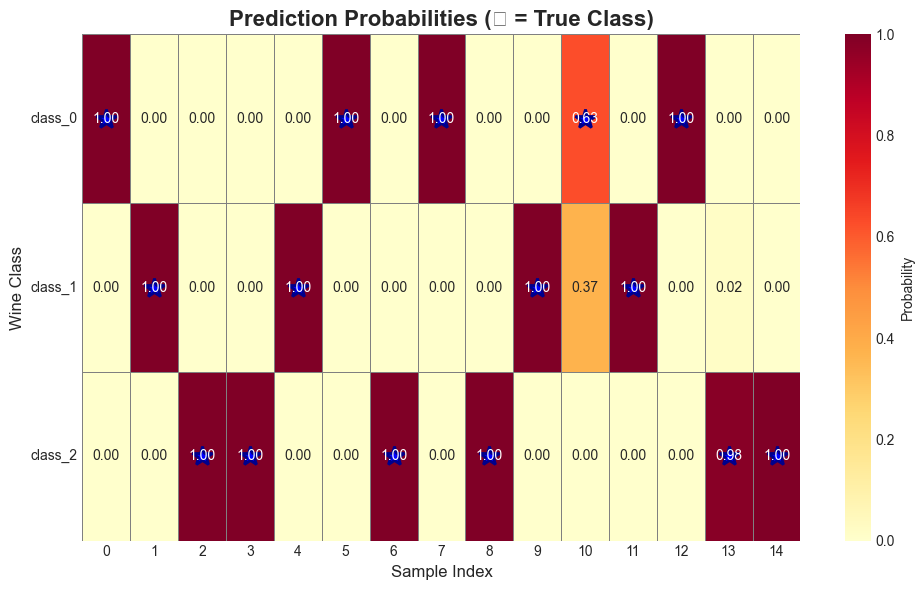

In [ ]:
plt.figure(figsize=(10, 6))

# Select 15 random test samples for visualization
n_samples_to_show = 15
sample_indices = np.random.choice(len(y_test), n_samples_to_show, replace=False)
sample_probs = y_pred_proba[sample_indices]
sample_true_labels = y_test[sample_indices]
sample_pred_labels = y_pred[sample_indices]

# Create heatmap of prediction probabilities
sns.heatmap(sample_probs.T, annot=True, fmt='.2f',
            cmap='YlOrRd', cbar_kws={'label': 'Probability'},
            linewidths=0.5, linecolor='gray')

plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Wine Class', fontsize=12)
plt.yticks(np.arange(len(target_names)) + 0.5, target_names, rotation=0)

# Add markers for true labels
for i, true_label in enumerate(sample_true_labels):
    plt.plot(i + 0.5, true_label + 0.5, 'b*', markersize=15,
            markeredgecolor='darkblue', markeredgewidth=2)

plt.title('Prediction Probabilities (★ = True Class)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### VISUALIZATION: Class Probability Distributions

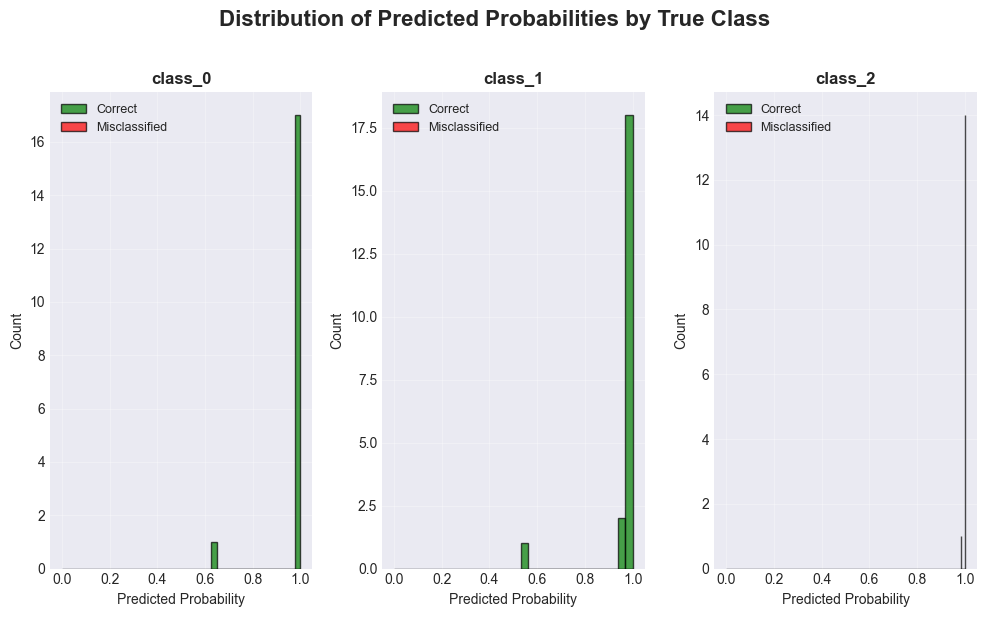

In [ ]:
plt.figure(figsize=(10, 6))

# For each class, show the distribution of predicted probabilities
for class_idx, class_name in enumerate(target_names):
    # Get probabilities for this class across all test samples
    class_probs = y_pred_proba[:, class_idx]

    # Separate into correct and incorrect predictions
    correct_mask = (y_test == class_idx) & (y_pred == class_idx)
    incorrect_mask = (y_test == class_idx) & (y_pred != class_idx)

    plt.subplot(1, 3, class_idx + 1)
    plt.hist(class_probs[correct_mask], bins=15, alpha=0.7,
            label='Correct', color='green', edgecolor='black')
    plt.hist(class_probs[incorrect_mask], bins=15, alpha=0.7,
            label='Misclassified', color='red', edgecolor='black')

    plt.xlabel('Predicted Probability', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.title(f'{class_name}', fontsize=12, fontweight='bold')
    plt.legend(fontsize=9)
    plt.grid(alpha=0.3)

plt.suptitle('Distribution of Predicted Probabilities by True Class',
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()